Sentinel-2 L2A test data from https://browser.dataspace.copernicus.eu/


In [15]:
import os
from osgeo import gdal
os.chdir('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# had to change utils to my_utils cause it has the same name with the one in my python environment 
from my_utils.geotif_io import readTiff, writeTiff
from my_utils.acc_pixel import acc_matrix
from watnet_infer import watnet_infer
# pip install tensorflow


In [18]:
import sys
# sys.path.append('h:\\My Drive\\Code\\Projects\\WatNet\\my_utils')  # Replace '/path/to/parent/directory' with the actual path
# print(sys.path)
# sys.path.append('h:\\My Drive\\Code\\Projects\\WatNet') 
# sys.path.append('h:\\My Drive\\Code\\Projects\\WatNet\\notebooks') 
# print(sys.path)
# # Remove a specific directory from sys.path
# path_to_remove = '/path/to/remove'
# if path_to_remove in sys.path:
#     sys.path.remove(path_to_remove)
# Get the current working directory and print 
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Change the current working directory
new_directory = 'H:/My Drive/Projects/Beavers/Beaver_EarthEngine/Sentinel2_6Bands_WatNet/Browser_images/'
os.chdir(new_directory)
print("Current working directory:", os.getcwd())

Current Directory: H:\My Drive\Projects\Beavers
Current working directory: H:\My Drive\Projects\Beavers\Beaver_EarthEngine\Sentinel2_6Bands_WatNet\Browser_images


In [19]:
# Download 10m from Sentinel data spcae then composite （did this in arc） 
sen_raster_path = "H:/My Drive/Projects/Beavers/Beaver_EarthEngine/Sentinel2_6Bands_WatNet/Browser_images/compositeBand_20210710_polygonA.tif"

# pre-trained model
watnet_model = 'H:/My Drive/Code/Projects/WatNet/model/pretrained/watnet.h5'
path_result_map = 'H:/My Drive/Projects/Beavers/Beaver_EarthEngine/Sentinel2_6Bands_WatNet/Browser_images/compositeBand_20210710_polygonA_water.tif'

## super parameters
patch_size = 512
overlay = 80  # the overlay area between neighboring patches


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0.]]]


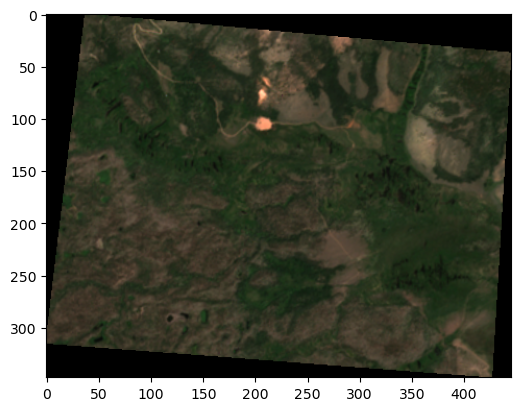

In [20]:
# # -----Load and prepare the satellite image data -----#
# sen2_img, img_info = readTiff(path_in = path_S2_img)
sen2_img, img_info = readTiff(path_in = sen_raster_path) # sen_raster_path  # 
sen2_img = np.float32(np.clip(sen2_img/100000, a_min=0, a_max=1))  ## normalization, had to divided by 100000 (not 1000) cause their values range from 0 to #####
print(sen2_img)
plt.figure(figsize=(6,6))
plt.imshow(sen2_img[:, :, (0,1,2)]*5)

In [21]:
### ---- surface water mapping by using pretrained watnet.
water_map = watnet_infer(rsimg=sen2_img, path_model = watnet_model)
print(water_map)

[[[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 ...

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]

 [[1]
  [1]
  [1]
  ...
  [1]
  [1]
  [1]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


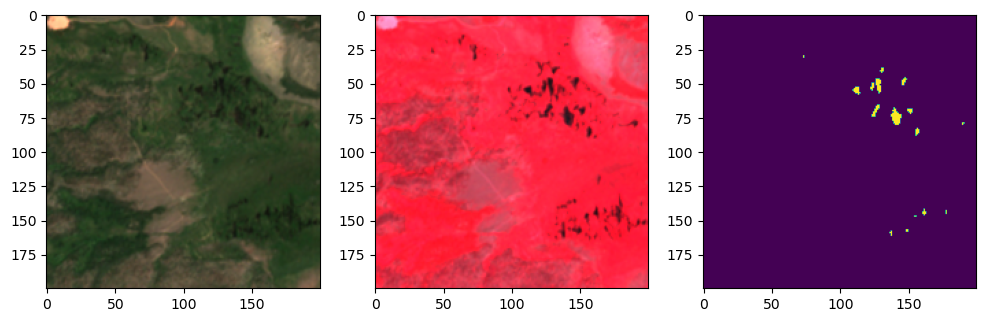

In [22]:
### show the result
plt.figure(figsize=(12,4)) 
plt.subplot(1,3,1)
plt.imshow(sen2_img[100:300, 200:400, (0,1,2)]*6.5) # row, columns, bands, scalar
plt.subplot(1,3,2)
plt.imshow(sen2_img[100:300, 200:400, (3,2,1)]*6.5)
plt.subplot(1,3,3)
plt.imshow(water_map[100:300, 200:400, 0])


### Save the result.

In [25]:
img_info

{'geoextent': (-11866795.586160462,
  -11862335.697678698,
  4994441.890757721,
  4997922.236063434),
 'geotrans': (-11866795.586160462,
  9.999749959112384,
  0.0,
  4997922.236063434,
  0.0,
  -10.000992257795671),
 'geosrs': '3857',
 'row': 348,
 'col': 446,
 'bands': 6}

In [26]:
# # save the result
writeTiff(im_data = water_map.astype(np.int8), 
          im_geotrans = img_info['geotrans'], 
          im_geosrs = img_info['geosrs'], 
          path_out = path_result_map)
